In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [5]:
history =  model.fit(X_train, y_train,
                     validation_split=0.2,
                     epochs=20, batch_size=50, verbose=1)

Epoch 1/20
7/7 [==============================] - 1s 27ms/step - loss: 9706.7324 - mean_squared_error: 9706.7324 - val_loss: 7423.1211 - val_mean_squared_error: 7423.1211
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 6082.2700 - mean_squared_error: 6082.2700 - val_loss: 4325.6011 - val_mean_squared_error: 4325.6011
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 3357.7168 - mean_squared_error: 3357.7168 - val_loss: 2227.8833 - val_mean_squared_error: 2227.8833
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 1601.0594 - mean_squared_error: 1601.0594 - val_loss: 952.4186 - val_mean_squared_error: 952.4186
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 597.3925 - mean_squared_error: 597.3925 - val_loss: 322.6822 - val_mean_squared_error: 322.6822
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 186.4142 - mean_squared_error: 186.4142 - val_loss: 107.1140 - val_mean_squared_error

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [7]:
mse_test = model.evaluate(X_test, y_test)
mse_test

4/4 [==============================] - 0s 4ms/step - loss: 71.4992 - mean_squared_error: 71.4992


[71.49916076660156, 71.49916076660156]

In [8]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
y_pred.round(2)

1/1 [==============================] - 0s 154ms/step


array([[13.  ],
       [20.79],
       [26.73],
       [19.96],
       [24.4 ]], dtype=float32)

In [9]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

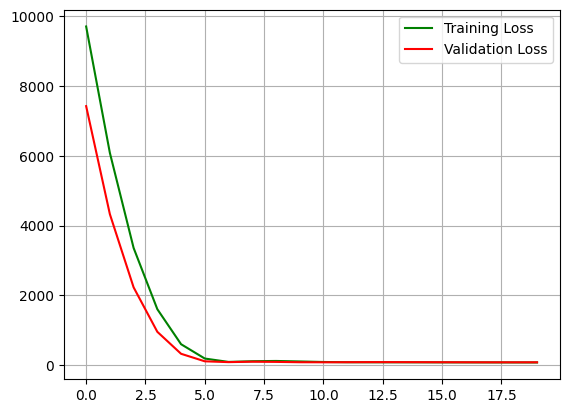

In [10]:
plt.plot(history.history['loss'], c='g', label='Training Loss')
plt.plot(history.history['val_loss'], c='r', label='Validation Loss')
plt.grid()
plt.legend(loc='best')
plt.show()